In [1]:
import swarms
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    plt.style.use('paper')
except:
    pass

In [2]:
Mearth = 5.97e24 # kg
Mjup = 318*Mearth # kg
AU = 1.496e11 # m
Rjup = 6.99e7 # m
pc = 3.086e16 # m
Lsun = 3.828e26 # W
Msun = 1.989e30 # kg
Rsun = 6.955e8 # m
Jansky = 1.e-26 # SI

Q=0.1
eta = 0.4; Nstr = 6.; Dt = 100.; Dmax = 150000.; R_pl = Rjup
lamb = 1.65e-6; g=0.32

In [20]:
%%time
age = 1.1e7 # yrs
Npts = 10

star = swarms.Star(L=0.023*Lsun, M=0.44*Msun, T=3700, d=46*pc)
a_plt = 0.7*star.d/pc*AU # middle of GPI FOV
Mplts = np.logspace(np.log10(20), np.log10(1590), Npts)*Mearth # ~Neptune to 5 Mj
CRs = np.zeros(Npts)
CR1, CR2, CR4 = np.zeros(Npts), np.zeros(Npts), np.zeros(Npts)
for i, M in enumerate(Mplts):
    planet = swarms.Planet(star, M=M, R=None, a=a_plt, Q=0.5, age=age, Z='002')
    CRs[i] = planet.CRthermal(lamb)
    swarm1 = swarms.CollSwarm(star, planet, 1*Mearth, Dt, Dmax, eta, Nstr, Q, correction=True, alpha=1./1.2, age=age)
    swarm2 = swarms.CollSwarm(star, planet, 1.e-2*Mearth, Dt, Dmax, eta, Nstr, Q, correction=True, alpha=1./1.2, age=age)
    swarm4 = swarms.CollSwarm(star, planet, 1.e-4*Mearth, Dt, Dmax, eta, Nstr, Q, correction=True, alpha=1./1.2, age=age)
    CR1[i] = swarm1.CRscat(g)
    CR2[i] = swarm2.CRscat(g)
    CR4[i] = swarm4.CRscat(g)

# mass = 636 vs time
Mplt = 636*Mearth
CRstime, CRs1time = np.zeros(Npts), np.zeros(Npts)
times = np.logspace(np.log10(1.1e7), 10, Npts)
for i, time in enumerate(times):
    planet = swarms.Planet(star, M=Mplt, R=None, a=a_plt, Q=0.5, age=time, Z='002')
    CRstime[i] = planet.CRthermal(lamb)
    swarm1 = swarms.CollSwarm(star, planet, 1*Mearth, Dt, Dmax, eta, Nstr, Q, correction=True, alpha=1./1.2, age=time)
    CRs1time[i] = swarm1.CRscat(g)

CPU times: user 926 ms, sys: 79.1 ms, total: 1.01 s
Wall time: 1 s


Text(1.1e+07,4e-06,'$1 M_\\oplus$')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


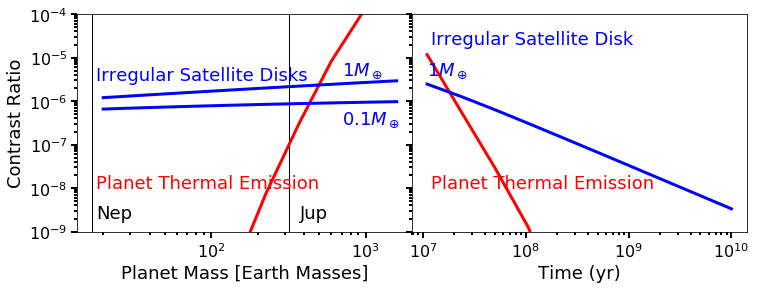

In [4]:
fig, axarr = plt.subplots(figsize=(12,4), ncols=2, sharey=True)
plt.subplots_adjust(wspace=0)
    
axarr[0].loglog(Mplts/Mearth, CRs, 'r')
axarr[0].loglog(Mplts/Mearth, CR1, 'b')
axarr[0].loglog(Mplts/Mearth, CR01, 'b')
contrast_thresh = 1.e-6    
#ax.hlines(contrast_thresh, GPIIWA, GPIOWA, linestyle='--', label="contrast threshold")
axarr[0].vlines(17, 1.e-16, 1, lw=1, color='k')
axarr[0].vlines(318, 1.e-16, 1, lw=1, color='k')

axarr[0].text(18, 2.e-9, "Nep", color='k', fontsize=18)
axarr[0].text(375, 2.e-9, "Jup", color='k', fontsize=18)
axarr[0].text(18, 1.e-8, "Planet Thermal Emission", color='r', fontsize=18)
axarr[0].text(18, 3.e-6, "Irregular Satellite Disks", color='b', fontsize=18)
axarr[0].text(700, 4.e-6, r"$1 M_\oplus$", color='b', fontsize=18)
axarr[0].text(700, 3.e-7, r"$0.1 M_\oplus$", color='b', fontsize=18)
#axarr[0].text(700, 3.e-8, r"$0.01 M_\oplus$", color='b', fontsize=18)
#axarr[0].set_title("              M2 star at 45 pc", fontsize=24)
axarr[0].set_xlabel("Planet Mass [Earth Masses]", fontsize=18)
axarr[0].set_ylabel("Contrast Ratio", fontsize=18)
axarr[0].set_yscale('log')
axarr[0].set_xscale('log')
axarr[0].set_ylim([1e-9, 1e-4])

#axarr[1].plot(times, cr_list, 'b')
axarr[1].loglog(times, CRstime, 'r')
axarr[1].loglog(times, CRs1time, 'b')
#axarr[1].set_xscale('log')
axarr[1].set_xlabel("Time (yr)", fontsize=18)
axarr[1].text(1.2e7, 1.e-8, "Planet Thermal Emission", color='r', fontsize=18)
axarr[1].text(1.2e7, 2.e-5, "Irregular Satellite Disk", color='b', fontsize=18)
axarr[1].text(1.1e7, 4.e-6, r"$1 M_\oplus$", color='b', fontsize=18)


(1e-11, 0.0001)

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


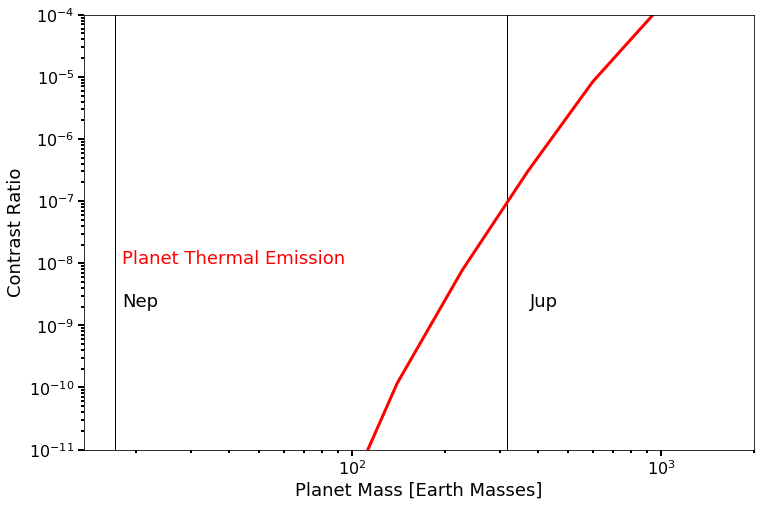

In [25]:
fig, axarr = plt.subplots(figsize=(12,8))
    
axarr.loglog(Mplts/Mearth, CRs, 'r')
#axarr.loglog(Mplts/Mearth, CR1, 'b')
#axarr.loglog(Mplts/Mearth, CR01, 'b')
contrast_thresh = 1.e-6    
#ax.hes(contrast_thresh, GPIIWA, GPIOWA, linestyle='--', label="contrast threshold")
axarr.vlines(17, 1.e-16, 1, lw=1, color='k')
axarr.vlines(318, 1.e-16, 1, lw=1, color='k')

axarr.text(18, 2.e-9, "Nep", color='k', fontsize=18)
axarr.text(375, 2.e-9, "Jup", color='k', fontsize=18)
axarr.text(18, 1.e-8, "Planet Thermal Emission", color='r', fontsize=18)
#axarr.text(18, 3.e-6, "Irregular Satellite Disks", color='b', fontsize=18)
#axarr.text(700, 4.e-6, r"$1 M_\oplus$", color='b', fontsize=18)
#axarr.text(700, 3.e-7, r"$0.1 M_\oplus$", color='b', fontsize=18)
#axarr[0].text(700, 3.e-8, r"$0.01 M_\oplus$", color='b', fontsize=18)
#axarr[0].set_title("              M2 star at 45 pc", fontsize=24)
axarr.set_xlabel("Planet Mass [Earth Masses]", fontsize=18)
axarr.set_ylabel("Contrast Ratio", fontsize=18)
axarr.set_yscale('log')
axarr.set_xscale('log')
axarr.set_ylim([1e-11, 1e-4])

(1e-11, 0.0001)

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


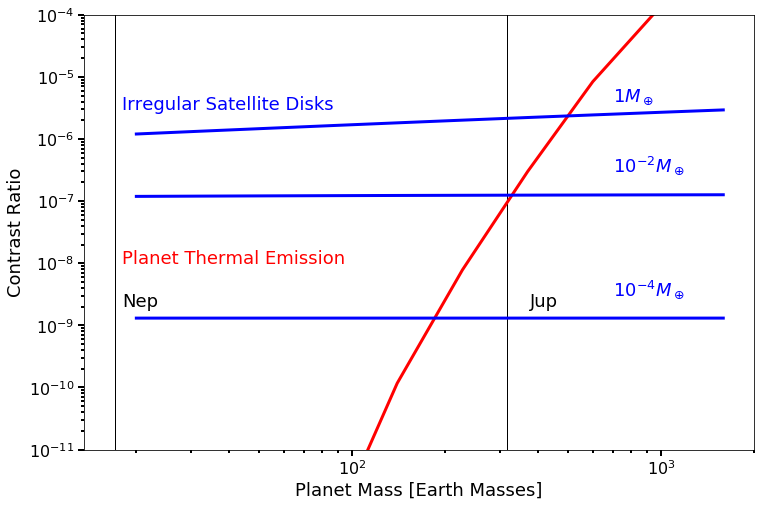

In [24]:
fig, axarr = plt.subplots(figsize=(12,8))
    
axarr.loglog(Mplts/Mearth, CRs, 'r')
axarr.loglog(Mplts/Mearth, CR1, 'b')
axarr.loglog(Mplts/Mearth, CR2, 'b')
axarr.loglog(Mplts/Mearth, CR4, 'b')
contrast_thresh = 1.e-6    
#ax.hes(contrast_thresh, GPIIWA, GPIOWA, linestyle='--', label="contrast threshold")
axarr.vlines(17, 1.e-16, 1, lw=1, color='k')
axarr.vlines(318, 1.e-16, 1, lw=1, color='k')

axarr.text(18, 2.e-9, "Nep", color='k', fontsize=18)
axarr.text(375, 2.e-9, "Jup", color='k', fontsize=18)
axarr.text(18, 1.e-8, "Planet Thermal Emission", color='r', fontsize=18)
axarr.text(18, 3.e-6, "Irregular Satellite Disks", color='b', fontsize=18)
axarr.text(700, 4.e-6, r"$1 M_\oplus$", color='b', fontsize=18)
axarr.text(700, 3.e-7, r"$10^{-2} M_\oplus$", color='b', fontsize=18)
axarr.text(700, 3.e-9, r"$10^{-4} M_\oplus$", color='b', fontsize=18)
#axarr[0].set_title("              M2 star at 45 pc", fontsize=24)
axarr.set_xlabel("Planet Mass [Earth Masses]", fontsize=18)
axarr.set_ylabel("Contrast Ratio", fontsize=18)
axarr.set_yscale('log')
axarr.set_xscale('log')
axarr.set_ylim([1e-11, 1e-4])

Text(0.5,1,'2 MJup Planet')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


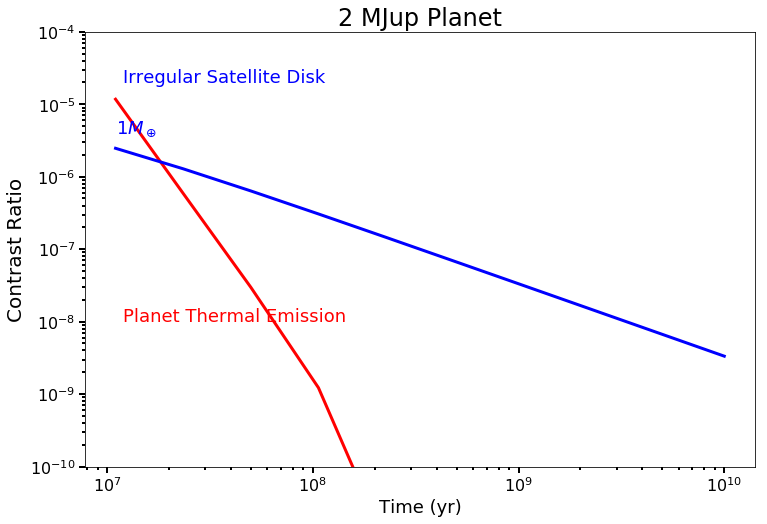

In [30]:
fig, axarr = plt.subplots(figsize=(12,8))

axarr.loglog(times, CRstime, 'r')
axarr.loglog(times, CRs1time, 'b')
axarr.set_xlabel("Time (yr)", fontsize=18)
axarr.text(1.2e7, 1.e-8, "Planet Thermal Emission", color='r', fontsize=18)
axarr.text(1.2e7, 2.e-5, "Irregular Satellite Disk", color='b', fontsize=18)
axarr.text(1.1e7, 4.e-6, r"$1 M_\oplus$", color='b', fontsize=18)
axarr.set_ylim([1e-10, 1e-4])
axarr.set_ylabel('Contrast Ratio')
axarr.set_title('2 MJup Planet')

In [8]:
from random import randint, seed, uniform
Mmin = 15 # Mearth (Nep)
Mmax = 13*318 # Mearth (Jup)
nvals = 600
# Draw mass from Nep to 13 Mjup according to m^-0.86 Clanton 16
# ignore normalization which goes into occurrence. We assume we draw a planet, just 
# want relative fractions correct
totoccurrence = 0.5
Npts = 1000
alpha = -0.86
ms = np.linspace(Mmin, Mmax, Npts)
pdf = ms**(alpha-1) # dN/dlogM = dN/dM * m, so dN/dM \propto m^(alpha-1)
cumpdf = np.cumsum(pdf)/pdf.sum() * totoccurrence
randv = np.random.uniform(size=nvals)
idxs = np.searchsorted(cumpdf, randv)
masses = ms[[idx for idx in idxs if idx < len(cumpdf)]]

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


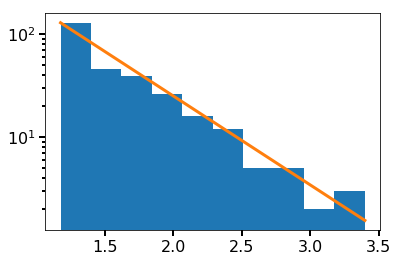

In [12]:
fig, ax = plt.subplots()
hist, edges, patches = ax.hist(np.log10(masses))
ax.plot(edges, 10**(np.log10(hist[0])+(edges-edges[0])*(alpha)))
ax.set_yscale('log')

In [32]:
%%time
Npts = 10
Dmax = 215000.
star = swarms.Star(L=Lsun, M=Msun, T=5800, d=10*pc)
a_plt = 9.6*star.d/pc*AU # middle of GPI FOV
Ms = np.zeros(Npts)
planet = swarms.Planet(star, M=95*Mearth, R=6e7, a=a_plt, Q=0.5, age=0, Z='002')
swarm = swarms.CollSwarm(star, planet, 1.e-2*Mearth, Dt, Dmax, eta, Nstr, Q, correction=True, alpha=1./1.2, age=0)
print(1/swarm.computeRCC()/1.e6)
times = np.logspace(np.log10(5e6), np.log10(5e9), Npts)

for i, time in enumerate(times):
    swarm.updateSwarm(time)
    Ms[i] = swarm.computeMtot(time)

9048.333824553742
CPU times: user 1.41 ms, sys: 907 µs, total: 2.32 ms
Wall time: 1.46 ms


/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


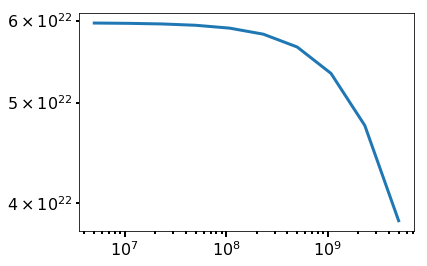

In [33]:
fig, ax = plt.subplots()
ax.loglog(times, Ms)

In [27]:
Ms

array([5.96371401e+22, 5.95647368e+22, 5.94093446e+22, 5.90773017e+22,
       5.83743992e+22, 5.69154572e+22, 5.40074047e+22, 4.86518473e+22,
       4.00875097e+22, 2.90646758e+22])